## Predicting Student Score using Linear Regression Model

### Introduction

We Have a student score data which have 2 variables, hours of studying and scores achieved by each student.
The Dataset have 25 rows and 2 variables.

### Objectives

Our Task is to build the best predictive model that predict students scores from their hours of studying.

### problem Solution

I will use Machine Learning regression analysis to model our data and create the prediction model, using different regression algorithms and use Mean square error to evaluate models performance and choose best performing models, after that i will check best 3 models for validation (check variance and bias), finally i will tune the best performing model.

### Importing and Assessing data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from scipy import stats 

In [2]:
st_score = pd.read_csv('student_scores.csv')

In [3]:
st_score.shape

(25, 2)

In [4]:
st_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
st_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**The Data has 2 Quantitative Variables, No duplicated values, No missing data, and neither quality issues nor Tidiness issues.**

### Exploratory Data Analysis 

#### Summary statistics

In [6]:
st_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Univariate EDA (Distribution):

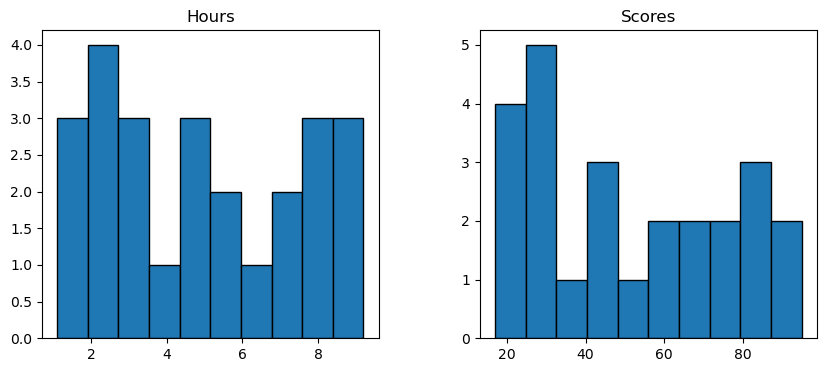

In [11]:
st_score.hist(figsize = (10,4) ,edgecolor ="black" ,grid = False);

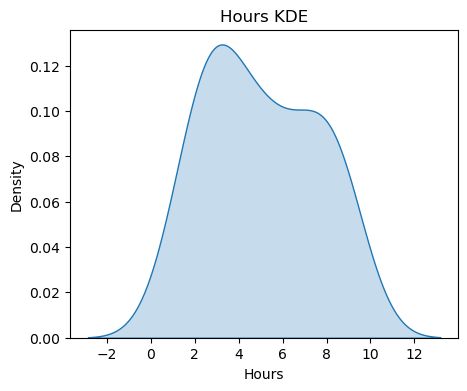

In [12]:
plt.figure(figsize = (5 ,4))
sns.kdeplot(x= st_score['Hours'] ,shade = True)
plt.title('Hours KDE')
plt.show()

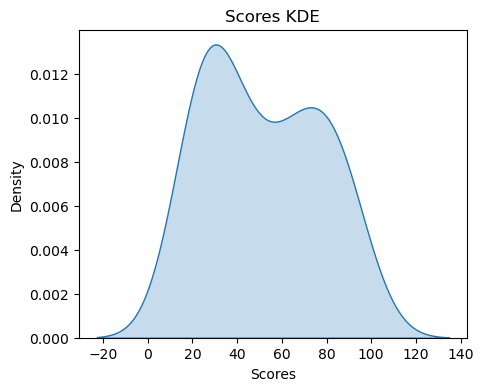

In [13]:
plt.figure(figsize = (5 ,4))
sns.kdeplot(x= st_score['Scores'] ,shade = True)
plt.title('Scores KDE')
plt.show()

**Important Notes**
* This 2 quantitative variables suppose to be normally distributed according to Central Limit Theorem, but the sample data set are too small so the normality distribution in the is not very clear ,is issue will affect our model performance.

#### Bivariate EDA

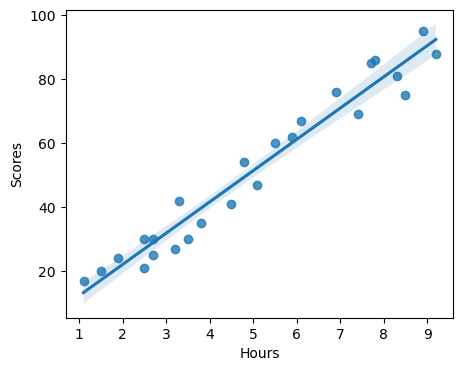

In [14]:
plt.figure(figsize = (5 ,4))
sns.regplot(x = st_score['Hours'] ,y = st_score['Scores']);

In [15]:
## correlation coefficient

coef = st_score['Hours'].corr(st_score['Scores'])
print(f'The Correlation Coefficient Between Hours and Scores Are : {coef}')

The Correlation Coefficient Between Hours and Scores Are : 0.9761906560220887


**Strong Positive Correlation**

### Statistical Modeling

**Methodology**

* **Building A simple linear regression model using Hours of Study as Explanatory Var and Scores as Response Var.**
* **I will use Statsmodel module to build our model to calculate the slope and intercept.**
* **Then Evaluate Our model By plotting the fitted(predicted scores) against residuals and plotting the residuals probability.**

In [16]:
## build regression model using statsmodel to quantify and interpretating the relationship between our variables

model = sm.ols('Scores ~ Hours' ,data = st_score).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           9.13e-17
Time:                        08:21:48   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
slope = model.params.Hours
intercept = model.params.Intercept
r_squared = model.rsquared

print(f'The Intercept of the line is {intercept}, the slope of the line is {slope} and R_squared is {r_squared}')

The Intercept of the line is 2.4836734053731675, the slope of the line is 9.775803390787472 and R_squared is 0.9529481969048356


**The Equation of our linear regression is : $$\hat{Y} = 2.48 + 9.77 X$$**

**This Means For every one hour increase in study time the scores increases by 9.77 point**

**Our R_squared is 0.95 which means our relationship is strong and hours variable can explain scores very well**

### Model Evaluation

* **1-Plotting Residuals against Predicted Values**
* **2-Probability plot of residual Values**

In [18]:
# creating dataframe for evaluation
st_score_eval = st_score.copy()

## predict scores
eval_predictions = model.predict(st_score_eval['Hours'])
st_score_eval['predicted_scores'] = eval_predictions

## calculating residuals
st_score_eval['residuals'] = st_score_eval['predicted_scores'] - st_score_eval['Scores']
                                 

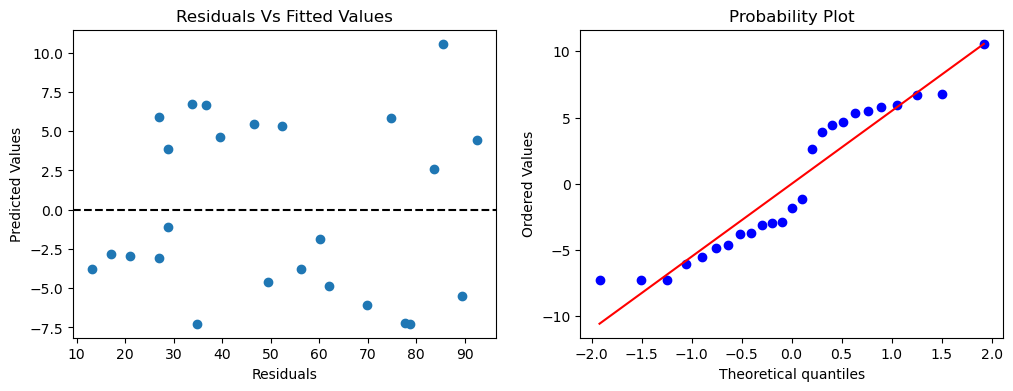

In [25]:
## plotting residuals

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(x = st_score_eval['predicted_scores'] ,y = st_score_eval['residuals'])
plt.axhline(0 ,ls = '--' ,color = 'black')
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.title('Residuals Vs Fitted Values')

plt.subplot(1,2,2)
res = stats.probplot(st_score_eval.residuals, plot = plt)

plt.show()

**The Residuals Values are an unbiased model with homoscedastic, which Means our model are unbiased and not variant**

### Making prediction

In [76]:
new_data = pd.DataFrame({'Hours':[9.25]})

predictions  = model.predict(new_data)
print(predictions)

0    92.909855
dtype: float64


**If a student studies 9.25 hours/day he/she will score 92.9 points with margin of error 5%**